In [1]:
from fastai.vision.all import *

In [2]:
#!pip install fastai_xla_extensions

In [3]:
#from fastai_xla_extensions.all import *

In [4]:
import pandas as pd

In [5]:
path = Path('/kaggle/input/100-bird-species')

In [6]:
#path = '/kaggle/input/100-bird-species'
df = pd.read_csv(path/'birds.csv')

In [7]:
df.head()

,class id,filepaths,labels,scientific label,data set
0,0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,Malacocincla abbotti,train
1,0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,Malacocincla abbotti,train
2,0,train/ABBOTTS BABBLER/003.jpg,ABBOTTS BABBLER,Malacocincla abbotti,train
3,0,train/ABBOTTS BABBLER/004.jpg,ABBOTTS BABBLER,Malacocincla abbotti,train
4,0,train/ABBOTTS BABBLER/005.jpg,ABBOTTS BABBLER,Malacocincla abbotti,train


In [8]:
def get_x(r) : return path/r['filepaths']
def get_y(r) : return r['labels']

In [9]:
dblock = DataBlock(get_x = get_x, get_y = get_y)
dsets = dblock.datasets(df)
dsets.train[0]

(Path('/kaggle/input/100-bird-species/train/CAATINGA CACHOLOTE/092.jpg'),
 'CAATINGA CACHOLOTE')

In [10]:
import warnings
try:
    import torch_xla
except ImportError as e:
    warnings.warn('TPU environment not available')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: TPU environment not available
  """


In [11]:
# train_path = Path('/kaggle/input/100-bird-species/train')
# test_path = Path('/kaggle/input/100-bird-species/test')

In [12]:
def splitter(df):
    train = df.index[df['data set'] == 'train'].tolist() 
    valid = df.index[df['data set'] == 'valid'].tolist() 
    return train,valid

In [13]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
            splitter = splitter,
            get_y = get_y,
            get_x = get_x,
            item_tfms=[Resize(220, method='squish')],
            batch_tfms=aug_transforms()
            )

In [14]:
dls = dblock.dataloaders(df)

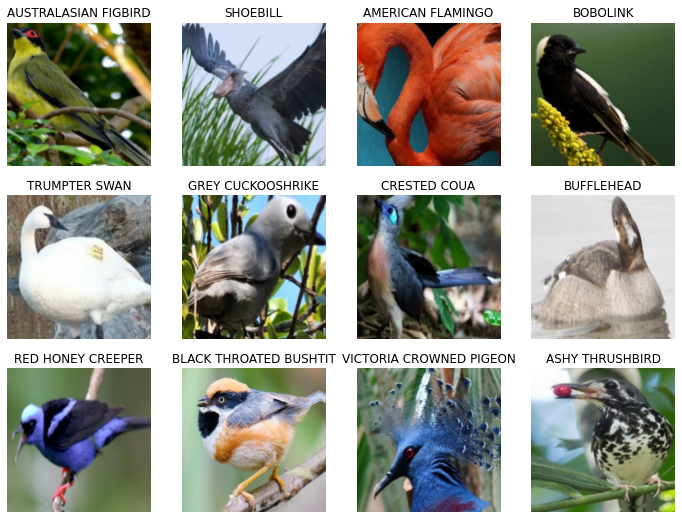

In [15]:
dls.show_batch(max_n=12, nrows=3)

In [16]:
learn = vision_learner(dls, resnet18, metrics=[accuracy,error_rate])

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

SuggestedLRs(valley=0.001737800776027143)

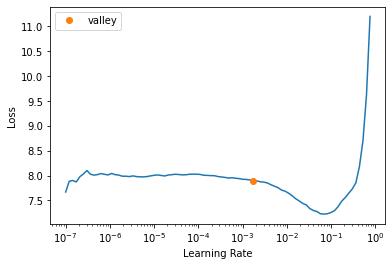

In [17]:
lr = learn.lr_find()
lr

In [18]:
learn.fine_tune(4, base_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.805720,0.722967,0.840889,0.159111,07:45


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.919494,0.318768,0.924889,0.075111,05:28
1,0.615985,0.189854,0.950667,0.049333,05:29
2,0.435524,0.134316,0.962222,0.037778,05:26
3,0.339667,0.128788,0.964444,0.035556,05:25


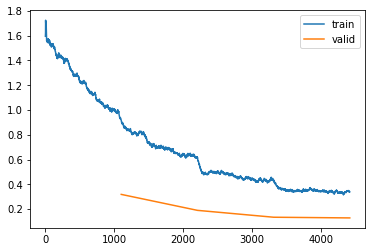

In [19]:
learn.recorder.plot_loss()

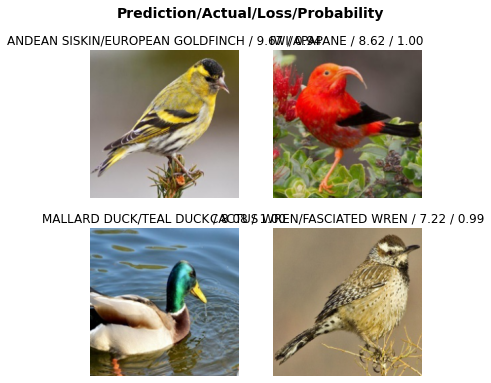

In [20]:
interp = ClassificationInterpretation.from_learner (learn)
interp.plot_top_losses(4, nrows=2)

In [21]:
# interp.confusion_matrix()

In [22]:
interp.most_confused()

[('AVADAVAT', 'STRAWBERRY FINCH', 3),
 ('GILDED FLICKER', 'NORTHERN FLICKER', 3),
 ('PURPLE FINCH', 'HOUSE FINCH', 3),
 ('DARWINS FLYCATCHER', 'VERMILION FLYCATHER', 2),
 ('GREATOR SAGE GROUSE', 'BLUE GROUSE', 2),
 ('HOUSE FINCH', 'PURPLE FINCH', 2),
 ('NORTHERN BEARDLESS TYRANNULET', 'GREATER PEWEE', 2),
 ('TRICOLORED BLACKBIRD', 'RED WINGED BLACKBIRD', 2),
 ('ABBOTTS BOOBY', 'ALBATROSS', 1),
 ('ABBOTTS BOOBY', 'SANDHILL CRANE', 1),
 ('AFRICAN PIED HORNBILL', 'CROW', 1),
 ('AMERICAN AVOCET', 'HAWFINCH', 1),
 ('AMERICAN PIPIT', 'ASHY THRUSHBIRD', 1),
 ('AMERICAN WIGEON', 'TEAL DUCK', 1),
 ('ANDEAN SISKIN', 'PURPLE FINCH', 1),
 ('APAPANE', 'IWI', 1),
 ('ASHY STORM PETREL', 'BLACK VENTED SHEARWATER', 1),
 ('ASHY STORM PETREL', 'GREY CUCKOOSHRIKE', 1),
 ('ASIAN DOLLARD BIRD', 'RED FACED CORMORANT', 1),
 ('AUCKLAND SHAQ', 'RED FACED CORMORANT', 1),
 ('AZARAS SPINETAIL', 'AUSTRAL CANASTERO', 1),
 ('AZURE JAY', 'AZURE TANAGER', 1),
 ('BLACK BAZA', 'NORTHERN MOCKINGBIRD', 1),
 ('BLUE COAU', '

In [23]:
# interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

# Using the Model for Inference

Save trained model in 'birds.pkl'

In [24]:
learn.export(fname='birds.pkl')

Verify model was saved successfully.

In [25]:
curr_path = Path()
curr_path.ls(file_exts='.pkl')

(#1) [Path('birds.pkl')]

Load saved model.

In [26]:
learn_inf = load_learner(curr_path/'birds.pkl')

Use model to predict.

In [27]:
learn_inf.predict(path/'images to test'/'firefinch.jpg')

('AFRICAN FIREFINCH',
 TensorBase(5),
 TensorBase([5.6165e-05, 2.2771e-07, 1.5154e-05, 8.2436e-07, 4.8745e-08, 8.9322e-01,
         1.1738e-04, 1.8271e-07, 2.8571e-06, 3.7443e-04, 1.1313e-04, 1.0945e-06,
         4.2419e-08, 2.4787e-07, 2.3075e-08, 4.7643e-08, 2.4608e-04, 5.7767e-07,
         4.0374e-08, 3.4788e-07, 3.6124e-09, 6.2693e-08, 1.4905e-06, 1.9917e-05,
         3.9082e-04, 8.1446e-07, 2.0336e-08, 6.3655e-06, 3.0854e-05, 1.0206e-08,
         1.2661e-08, 2.0125e-03, 3.5620e-06, 4.2295e-06, 8.2555e-06, 9.8146e-08,
         9.7742e-03, 6.8048e-05, 3.0048e-08, 1.9465e-07, 3.1061e-06, 6.8048e-04,
         2.9710e-06, 3.1114e-06, 1.4334e-07, 7.6282e-05, 2.2092e-06, 3.4362e-08,
         2.5725e-06, 4.2379e-03, 6.4680e-09, 6.9274e-08, 3.1024e-08, 1.4948e-06,
         5.4601e-06, 4.7805e-07, 1.0345e-05, 2.1615e-05, 1.2936e-04, 6.5224e-06,
         2.2787e-07, 6.8743e-08, 4.4390e-07, 1.2930e-05, 5.7549e-06, 5.4976e-08,
         1.8559e-08, 2.0033e-06, 3.7017e-08, 3.7847e-08, 1.4092e-06

In [28]:
from fastai.vision.widgets import *

In [29]:
btn_upload = widgets.FileUpload()

In [30]:
out_pl = widgets.Output()

In [31]:
lbl_pred = widgets.Label()

In [32]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: 
        display(img.to_thumb(128,128))
        pred, pred_idx, probs = learn_inf.predict(img)
        lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [33]:
btn_run = widgets.Button(description='Classify')
btn_run.on_click(on_click_classify)

In [34]:
VBox([widgets.Label('Select your bird!'), btn_upload, btn_run, out_pl, lbl_pred])